In [34]:
import numpy as np
import matplotlib.pyplot as plt
import inspect
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd
import os
from matplotlib.ticker import MaxNLocator

In [18]:
current_directory = os.getcwd()
limesegment_folder = os.path.dirname(current_directory)  
result_folder = os.path.join(limesegment_folder, 'Experiments', 'records', 'result_data')

csv_files = [os.path.join(result_folder, file) for file in os.listdir(result_folder) if file.endswith('.csv') and 'l2' not in file]

dataframes = {}

for file in csv_files:
    df = pd.read_csv(file, index_col=0)  
    
    file_name = os.path.basename(file).replace('.csv', '')
    
    dataframes[file_name] = df

for name, df in dataframes.items():
    print(f"DataFrame for {name}:\n", df)

DataFrame for Strawberry:
           Accuracy  Precision    Recall  F1 Score
Strategy                                         
original  0.754054   0.791610  0.754054  0.717506
RBP       0.716216   0.734905  0.716216  0.670336
MRBP      0.656757   0.776187  0.656757  0.533808
zero      0.724324   0.740459  0.724324  0.684228
noise     0.643243   0.413762  0.643243  0.503592
blur      0.754054   0.791610  0.754054  0.717506
DataFrame for MiddlePhalanxTW:
           Accuracy  Precision    Recall  F1 Score
Strategy                                         
original  0.435065   0.488125  0.435065  0.447326
RBP       0.344156   0.413526  0.344156  0.335716
MRBP      0.077922   0.277896  0.077922  0.022326
zero      0.428571   0.425486  0.428571  0.408227
noise     0.292208   0.233464  0.292208  0.195806
blur      0.363636   0.465473  0.363636  0.395744
DataFrame for OSUleaf:
           Accuracy  Precision    Recall  F1 Score
Strategy                                         
original  0.51239

In [21]:
current_directory = os.getcwd()
limesegment_folder = os.path.dirname(current_directory)  
result_folder = os.path.join(limesegment_folder, 'Experiments', 'records', 'result_data')

csv_files = [os.path.join(result_folder, file) for file in os.listdir(result_folder) if file.endswith('.csv') and 'l2' in file]

strategies = ['RBP', 'MRBP', 'zero', 'noise', 'blur']

l2_dataframes = {}

for file in csv_files:
    df = pd.read_csv(file)  
    
    df.columns = ['L2-Norm']
    
    df.index = strategies[:len(df)]

    file_name = os.path.basename(file).replace('.csv', '').rstrip('l2')
    
    l2_dataframes[file_name] = df

for filename, df in l2_dataframes.items():
    print(f"DataFrame for {filename}:\n{df}\n")

DataFrame for Strawberry:
         L2-Norm
RBP     5.553233
MRBP    7.952276
zero    7.542306
noise  12.112132
blur    0.551031

DataFrame for Computers:
         L2-Norm
RBP     8.023789
MRBP   10.853251
zero   10.280979
noise  36.742094
blur    2.600488

DataFrame for ChlorineConcentration:
         L2-Norm
RBP     6.969212
MRBP    7.897956
zero    7.473490
noise  11.293362
blur    3.502938

DataFrame for RefrigerationDevices:
         L2-Norm
RBP    10.090240
MRBP   14.178094
zero   14.069803
noise  22.786790
blur    3.325718

DataFrame for MiddlePhalanxTW:
         L2-Norm
RBP     6.622172
MRBP    6.974084
zero    6.865685
noise  10.639391
blur    1.684717

DataFrame for FordB:
         L2-Norm
RBP     4.082597
MRBP    5.224580
zero    5.100508
noise  10.068231
blur    0.328173

DataFrame for MedicalImages:
        L2-Norm
RBP    3.327622
MRBP   4.463439
zero   4.005427
noise  8.222989
blur   0.233265

DataFrame for SwedishLeaf:
        L2-Norm
RBP    4.496359
MRBP   5.065455
zero 

In [19]:
accuracy_data = pd.DataFrame()

# 遍历每一个 DataFrame，提取 RBP 和 MRBP 的 Accuracy
for name, df in dataframes.items():
    rbp_accuracy = df.loc['RBP', 'Accuracy']
    mrbp_accuracy = df.loc['MRBP', 'Accuracy']
    accuracy_data[name] = [rbp_accuracy, mrbp_accuracy]

# 设置新 DataFrame 的索引
accuracy_data.index = ['RBP Accuracy', 'MRBP Accuracy']

# 查看结果
print("Accuracy DataFrame:")
print(accuracy_data)

Accuracy DataFrame:
               Strawberry  MiddlePhalanxTW   OSUleaf  MedicalImages  \
RBP Accuracy     0.716216         0.344156  0.363636       0.538158   
MRBP Accuracy    0.656757         0.077922  0.297521       0.467105   

               Computers  ChlorineConcentration  RefrigerationDevices  \
RBP Accuracy       0.740               0.280469              0.461333   
MRBP Accuracy      0.536               0.276562              0.450667   

                  FordB  SwedishLeaf     Wafer  
RBP Accuracy   0.907576       0.5296  0.539260  
MRBP Accuracy  0.517424       0.3568  0.108371  


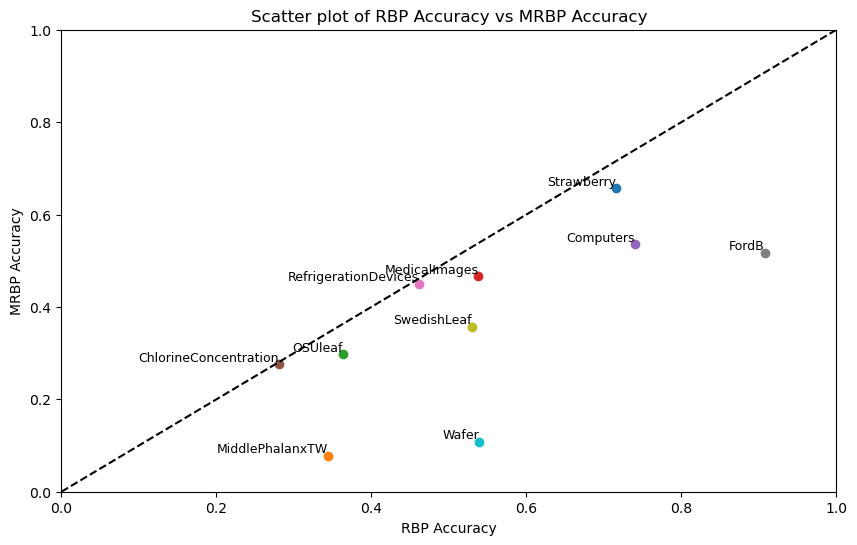

In [38]:
plt.figure(figsize=(10, 6))

# 遍历每一列，绘制散点图并进行阴影填充
for column in accuracy_data.columns:
    x = accuracy_data.loc['RBP Accuracy', column]
    y = accuracy_data.loc['MRBP Accuracy', column]

    # 绘制每个数据点
    plt.scatter(x, y, label=column)

    # 标注数据点
    plt.text(x, y, column, fontsize=9, ha='right', va='bottom')


# 绘制45度分割线
plt.plot([0, 1], [0, 1], color='black', linestyle='--')

# 设置坐标轴标签
plt.xlabel('RBP Accuracy')
plt.ylabel('MRBP Accuracy')

# 设置标题
plt.title('Scatter plot of RBP Accuracy vs MRBP Accuracy')

# 设置坐标轴范围
plt.xlim(0, 1)
plt.ylim(0, 1)

# 显示网格
#plt.grid(True)

# 显示图形
#plt.axis('equal')
plt.show()


In [17]:
accuracy_data = pd.DataFrame()

# 遍历每一个 DataFrame，提取 RBP 和 MRBP 的 Accuracy
for name, df in dataframes.items():
    rbp_accuracy = 1 - (df.loc['RBP', 'Accuracy'] / df.loc['original', 'Accuracy'])
    mrbp_accuracy = 1 - (df.loc['MRBP', 'Accuracy'] / df.loc['original', 'Accuracy'])
    zero_accuracy = 1 - (df.loc['zero', 'Accuracy'] / df.loc['original', 'Accuracy'])
    noise_accuracy = 1 - (df.loc['noise', 'Accuracy'] / df.loc['original', 'Accuracy'])
    blur_accuracy = 1 - (df.loc['blur', 'Accuracy'] / df.loc['original', 'Accuracy'])
    accuracy_data[name] = [rbp_accuracy, mrbp_accuracy, zero_accuracy, noise_accuracy, blur_accuracy]

# 设置新 DataFrame 的索引
accuracy_data.index = ['RBP Accuracy', 'MRBP Accuracy', 'Zero Accuracy', 'Noise Accuracy', 'Blur Accuracy']

# 查看结果
print("Accuracy DataFrame:")
print(accuracy_data)

Accuracy DataFrame:
                Strawberry  MiddlePhalanxTW   OSUleaf  MedicalImages  \
RBP Accuracy      0.050179         0.208955  0.290323       0.046620   
MRBP Accuracy     0.129032         0.820896  0.419355       0.172494   
Zero Accuracy     0.039427         0.014925  0.233871       0.053613   
Noise Accuracy    0.146953         0.328358  0.725806       0.303030   
Blur Accuracy     0.000000         0.164179  0.145161       0.020979   

                Computers  ChlorineConcentration  RefrigerationDevices  \
RBP Accuracy     0.031414               0.485428             -0.029762   
MRBP Accuracy    0.298429               0.492594             -0.005952   
Zero Accuracy    0.052356               0.480172             -0.017857   
Noise Accuracy   0.277487               0.387004             -0.011905   
Blur Accuracy    0.031414               0.424749             -0.071429   

                   FordB  SwedishLeaf     Wafer  
RBP Accuracy    0.056693     0.336673  0.441907  
MR

import pandas as pd
import os
import matplotlib.pyplot as plt

# 假设l2_dataframes和dataframes已经按之前的逻辑准备好
# 用于绘图的DataFrame是accuracy_data，它存储了每个数据集的各个策略的计算后的accuracy值

# 设置策略名称、颜色映射和形状映射
strategies = ['RBP', 'MRBP']
colors = ['red', 'green', 'blue', 'purple', 'orange']  # 不同策略的颜色
markers = ['o', 's', '^', 'D', 'X', 'p', '*', 'H', 'v', '<', '>']  # 不同数据集的形状

# 初始化一个空列表，用于存储所有散点的x和y值
x_vals = []  # 存储Accuracy值
y_vals = []  # 存储L2-Norm值
labels = []  # 存储标签（策略名称）
datasets = []  # 存储数据集名称（键值）

# 遍历每个数据集（每个字典的键）
for i, key in enumerate(dataframes.keys()):
    # 获取accuracy_data和l2_dataframes对应的数据
    accuracy_vals = accuracy_data[key].values  # 获取修改后的Accuracy
    l2_vals = l2_dataframes[key]['L2-Norm'].values  # 获取L2-Norm

    # 遍历每个策略，收集对应的值
    for j, strategy in enumerate(strategies):
        accuracy = accuracy_vals[j]
        l2_norm = l2_vals[j]  # 获取L2-Norm值
        
        # 将数据添加到x_vals, y_vals, labels和datasets中
        x_vals.append(accuracy)
        y_vals.append(l2_norm)
        labels.append(strategy)
        datasets.append(key)  # 存储数据集名称，作为标签区分不同的数据集

# 绘制所有散点
plt.figure(figsize=(10, 8))

# 为每个数据集分配一个不同的形状
for i, key in enumerate(dataframes.keys()):
    # 根据数据集的索引为每个数据集的散点选择颜色和形状
    color = colors[i % len(colors)]  # 颜色重复使用
    marker = markers[i % len(markers)]  # 形状也重复使用
    
    # 提取对应数据集的x和y值
    dataset_x = [x_vals[j] for j in range(len(datasets)) if datasets[j] == key]
    dataset_y = [y_vals[j] for j in range(len(datasets)) if datasets[j] == key]
    
    # 绘制散点
    plt.scatter(dataset_x, dataset_y, color=color, label=key, marker=marker, s=100)

# 添加标签和标题
plt.xlabel('Modified Accuracy (1 - (current_strategy_accuracy / original_accuracy))')
plt.ylabel('L2-Norm')
plt.title('Scatter Plot for All Datasets with Modified Accuracy')

# 显示图例
plt.legend(title="Dataset")

# 显示图像
plt.grid(True)
plt.show()



Accuracy DataFrame:
                Strawberry  MiddlePhalanxTW   OSUleaf  MedicalImages  \
RBP Accuracy      0.050179         0.208955  0.290323       0.046620   
MRBP Accuracy     0.129032         0.820896  0.419355       0.172494   
Zero Accuracy     0.039427         0.014925  0.233871       0.053613   
Noise Accuracy    0.146953         0.328358  0.725806       0.303030   
Blur Accuracy     0.000000         0.164179  0.145161       0.020979   

                Computers  ChlorineConcentration  RefrigerationDevices  \
RBP Accuracy     0.031414               0.485428             -0.029762   
MRBP Accuracy    0.298429               0.492594             -0.005952   
Zero Accuracy    0.052356               0.480172             -0.017857   
Noise Accuracy   0.277487               0.387004             -0.011905   
Blur Accuracy    0.031414               0.424749             -0.071429   

                   FordB  SwedishLeaf     Wafer  
RBP Accuracy    0.056693     0.336673  0.441907  
MR

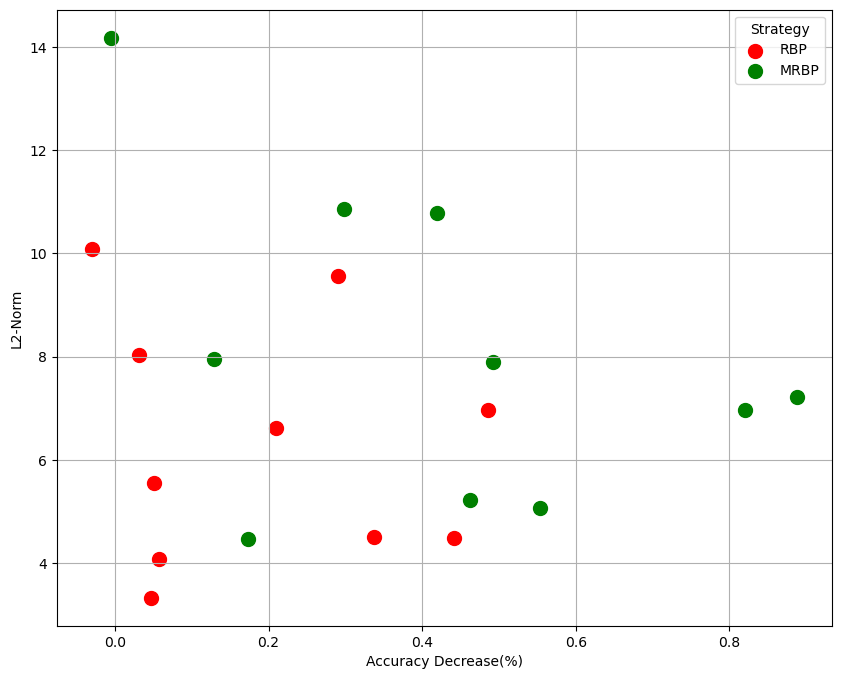

In [27]:
accuracy_data = pd.DataFrame()

# 遍历每一个 DataFrame，提取 RBP 和 MRBP 的 Accuracy
for name, df in dataframes.items():
    rbp_accuracy = 1 - (df.loc['RBP', 'Accuracy'] / df.loc['original', 'Accuracy'])
    mrbp_accuracy = 1 - (df.loc['MRBP', 'Accuracy'] / df.loc['original', 'Accuracy'])
    zero_accuracy = 1 - (df.loc['zero', 'Accuracy'] / df.loc['original', 'Accuracy'])
    noise_accuracy = 1 - (df.loc['noise', 'Accuracy'] / df.loc['original', 'Accuracy'])
    blur_accuracy = 1 - (df.loc['blur', 'Accuracy'] / df.loc['original', 'Accuracy'])
    accuracy_data[name] = [rbp_accuracy, mrbp_accuracy, zero_accuracy, noise_accuracy, blur_accuracy]

# 设置新 DataFrame 的索引
accuracy_data.index = ['RBP Accuracy', 'MRBP Accuracy', 'Zero Accuracy', 'Noise Accuracy', 'Blur Accuracy']

# 查看结果
print("Accuracy DataFrame:")
print(accuracy_data)

# 准备策略名称和颜色映射
#strategies = ['RBP', 'MRBP', 'zero', 'noise', 'blur']
strategies = ['RBP', 'MRBP']
colors = ['red', 'green', 'blue', 'purple', 'orange']  # 不同策略的颜色

# 初始化一个空列表，用于存储所有散点的x和y值
x_vals = []  # 存储Accuracy值
y_vals = []  # 存储L2-Norm值
labels = []  # 存储标签（策略名称）

# 遍历每个数据集
for key in dataframes.keys():
    # 获取dataframes和l2_dataframes对应的数据
    accuracy_vals = accuracy_data[key].values  # 获取修改后的Accuracy
    l2_vals = l2_dataframes[key]['L2-Norm'].values  # 获取L2-Norm

    # 遍历每个策略，收集对应的值
    for i, strategy in enumerate(strategies):
        accuracy = accuracy_vals[i]
        l2_norm = l2_vals[i]  # 获取L2-Norm值
        
        # 将数据添加到x_vals, y_vals, labels中
        x_vals.append(accuracy)
        y_vals.append(l2_norm)
        labels.append(strategy)

# 绘制所有散点
plt.figure(figsize=(10, 8))

# 绘制所有策略的散点，使用不同的颜色
for i, strategy in enumerate(strategies):
    # 根据策略为每个策略的散点选择颜色
    color = colors[i]
    
    # 提取对应策略的x和y值
    strategy_x = [x_vals[j] for j in range(len(labels)) if labels[j] == strategy]
    strategy_y = [y_vals[j] for j in range(len(labels)) if labels[j] == strategy]
    
    # 绘制散点
    plt.scatter(strategy_x, strategy_y, color=color, label=strategy, s=100)

# 添加标签和标题
plt.xlabel('Accuracy Decrease(%)')
plt.ylabel('L2-Norm')
plt.legend(title="Strategy")

# 显示图像
plt.grid(True)
plt.show()


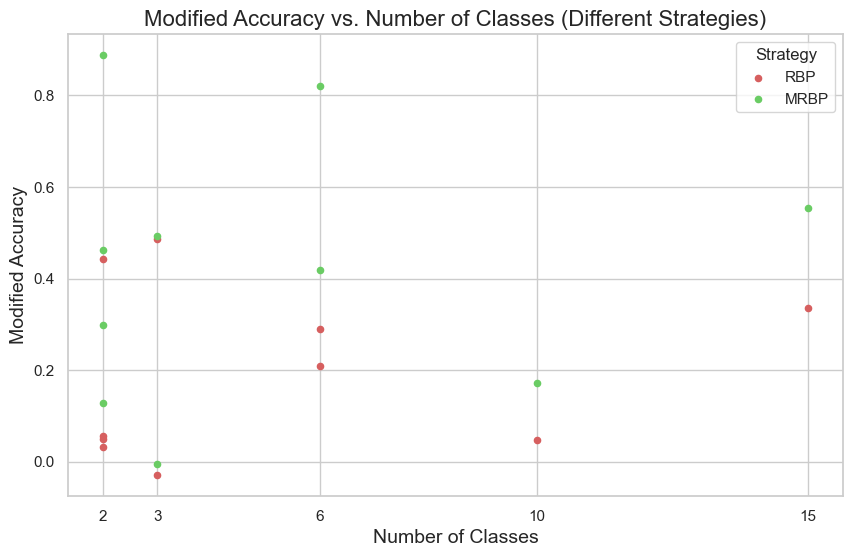

In [46]:
import matplotlib.pyplot as plt
import numpy as np

# 假设 dataframes 和类别数量已经准备好
dataset_names = ['MedicalImages', 'MiddlePhalanxTW', 'Strawberry', 'SwedishLeaf', 
                 'Wafer', 'FordA', 'ChlorineConcentration', 'FordB', 'OSUleaf', 
                 'RefrigerationDevices', 'Computers']  # 数据集名称
num_classes = [10, 6, 2, 15, 2, 2, 3, 2, 6, 3, 2]  # 类别数量

# 将类别数量和数据集名称对应
dataset_class_mapping = dict(zip(dataset_names, num_classes))

accuracy_data = {}

# 计算 Modified Accuracy
for name, df in dataframes.items():
    rbp_accuracy = 1 - (df.loc['RBP', 'Accuracy'] / df.loc['original', 'Accuracy'])
    mrbp_accuracy = 1 - (df.loc['MRBP', 'Accuracy'] / df.loc['original', 'Accuracy'])
    zero_accuracy = 1 - (df.loc['zero', 'Accuracy'] / df.loc['original', 'Accuracy'])
    noise_accuracy = 1 - (df.loc['noise', 'Accuracy'] / df.loc['original', 'Accuracy'])
    blur_accuracy = 1 - (df.loc['blur', 'Accuracy'] / df.loc['original', 'Accuracy'])
    
    # 存储到字典
    accuracy_data[name] = [rbp_accuracy, mrbp_accuracy, zero_accuracy, noise_accuracy, blur_accuracy]

# 将 accuracy_data 转换为列表，便于绘图
modified_accuracy_values = []
expanded_num_classes = []
colors = []  # 用于存储每个策略的颜色
labels = []  # 用于存储每个数据点的标签（策略名称）

# 为不同的策略指定颜色
strategy_colors = {
    'RBP': 'r',   # 红色
    'MRBP': 'g',  # 绿色
    'zero': 'b',  # 蓝色
    'noise': 'm', # 品红
    'blur': 'y'   # 黄色
}

# 遍历 accuracy_data，使用 dataset_class_mapping 获取类别数量
for dataset_name, accuracies in accuracy_data.items():
    # 获取对应数据集的类别数量
    num_class = dataset_class_mapping.get(dataset_name, None)
    if num_class is not None:
        # 为每个策略指定不同颜色
        modified_accuracy_values.extend(accuracies)
        expanded_num_classes.extend([num_class] * 5)  # 每个数据集有5个策略
        colors.extend([strategy_colors[strategy] for strategy in ['RBP', 'MRBP', 'zero', 'noise', 'blur']])
        labels.extend(['RBP', 'MRBP', 'zero', 'noise', 'blur'])

# 绘制散点图
plt.figure(figsize=(10, 6))

# 根据策略的颜色绘制不同颜色的散点
#for strategy in ['RBP', 'MRBP', 'zero', 'noise', 'blur']:
for strategy in ['RBP', 'MRBP']:
    mask = np.array(labels) == strategy
    plt.scatter(np.array(expanded_num_classes)[mask], 
                np.array(modified_accuracy_values)[mask], 
                color=strategy_colors[strategy], 
                label=strategy, 
                s=20)

# 设置标题和标签
plt.title('Modified Accuracy vs. Number of Classes (Different Strategies)', fontsize=16)
plt.xlabel('Number of Classes', fontsize=14)
plt.ylabel('Modified Accuracy', fontsize=14)

plt.xticks([2, 3, 6, 10, 15])



# 显示图例
plt.legend(title='Strategy')

# 显示图形
plt.show()


[0.1        0.36666667 0.63333333 0.9       ]
[0.49, 0.51]
[0.49, 0.51]
[0.1]
[0.1]


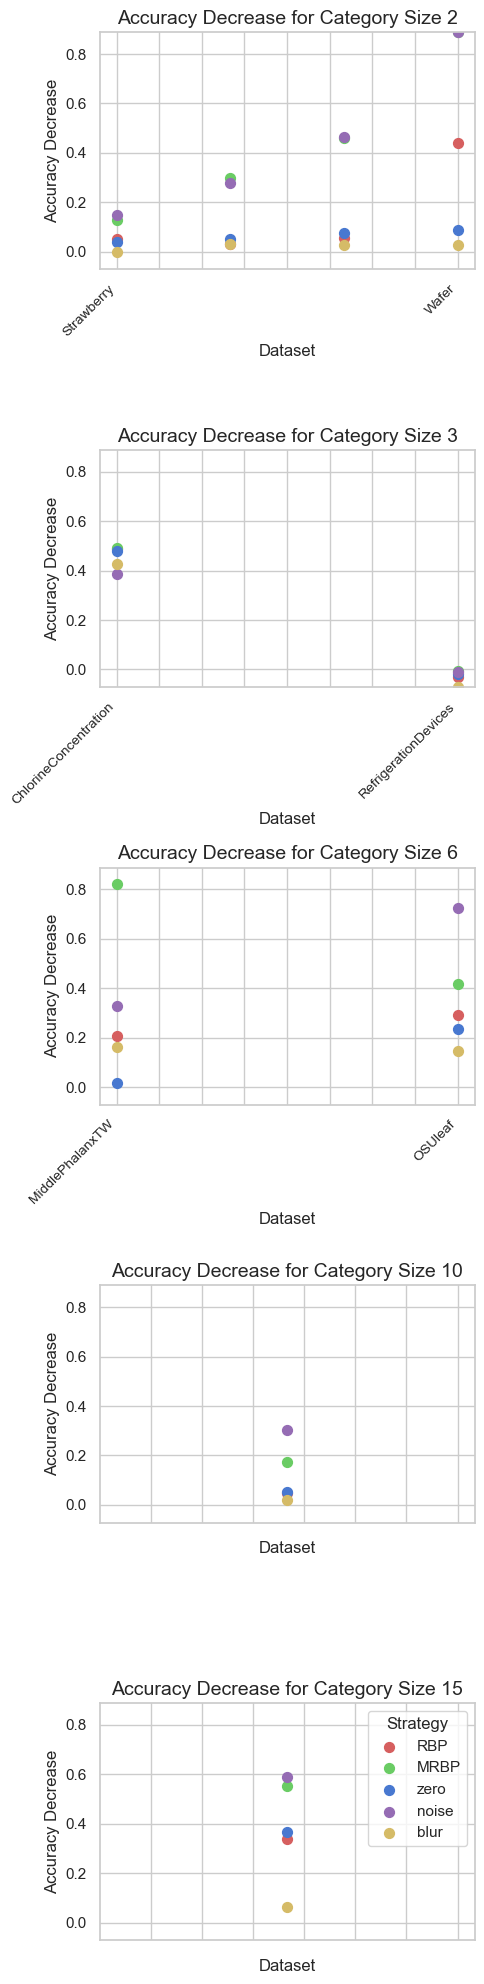

In [63]:
import matplotlib.pyplot as plt
import numpy as np

# 你已经计算了 accuracy_decreases
# 计算每个数据集每个策略的 accuracy decrease
accuracy_decreases = {}
dataset_class_mapping = dict(zip(dataset_names, num_classes))  # 类别数量映射

for name, df in dataframes.items():
    accuracy_decreases[name] = {
        'RBP': 1 - (df.loc['RBP', 'Accuracy'] / df.loc['original', 'Accuracy']),
        'MRBP': 1 - (df.loc['MRBP', 'Accuracy'] / df.loc['original', 'Accuracy']),
        'zero': 1 - (df.loc['zero', 'Accuracy'] / df.loc['original', 'Accuracy']),
        'noise': 1 - (df.loc['noise', 'Accuracy'] / df.loc['original', 'Accuracy']),
        'blur': 1 - (df.loc['blur', 'Accuracy'] / df.loc['original', 'Accuracy'])
    }

# 按类别数量分组
categories = [2, 3, 6, 10, 15]
grouped_datasets = {category: [] for category in categories}

# 将数据集根据类别数量分组
for dataset_name in accuracy_decreases:
    num_class = dataset_class_mapping.get(dataset_name)
    if num_class in grouped_datasets:
        grouped_datasets[num_class].append(dataset_name)

# 获取所有 accuracy_decrease 的最大最小值，用来统一纵轴范围
all_accuracy_decreases = []
for group in grouped_datasets.values():
    for dataset in group:
        all_accuracy_decreases.extend(accuracy_decreases[dataset].values())
        
y_min = min(all_accuracy_decreases)
y_max = max(all_accuracy_decreases)

# 绘制图形
fig, axes = plt.subplots(len(categories), 1, figsize=(5, 20), sharey=True)

# 设置颜色，避免重名问题
strategy_colors = {
    'RBP': 'r',
    'MRBP': 'g',
    'zero': 'b',
    'noise': 'm',
    'blur': 'y'
}

# 绘制每个类别数量的子图
for i, category in enumerate(categories):
    ax = axes[i]
    ax.set_title(f'Accuracy Decrease for Category Size {category}', fontsize=14)
    ax.set_xlabel('Dataset', fontsize=12)
    ax.set_ylabel('Accuracy Decrease', fontsize=12)
    ax.set_ylim(y_min, y_max)

    grouped_datasets_category = grouped_datasets[category]
    num_datasets = len(grouped_datasets_category)
    if num_datasets == 2:
        # 将两个点放在中间的位置，避免最左和最右
        x_positions = [0.49, 0.51]
    else:
        x_positions = np.linspace(0.1, 0.9, num_datasets)
    
    # 对每个数据集，绘制每个策略的 accuracy decrease
    #x_positions = np.arange(len(grouped_datasets[category]))  # 数据集的横坐标位置
    for j, dataset_name in enumerate(grouped_datasets[category]):
        accuracy_values = list(accuracy_decreases[dataset_name].values())
        
        # 为每个策略绘制一个点，并且使用不同颜色
        for k, (strategy, accuracy_value) in enumerate(accuracy_decreases[dataset_name].items()):
            ax.scatter(x_positions[j], accuracy_value, label=strategy if j == 0 else "", 
                       color=strategy_colors[strategy], s=50)  # s=50 控制点的大小

    # 设置横坐标
    print(x_positions)
    ax.set_xticks(x_positions)
    ax.set_xticklabels(grouped_datasets[category], rotation=45, ha='right', fontsize=10)
    ax.xaxis.set_major_locator(MaxNLocator(integer=True, prune='both'))
    
    # 显示统一的策略标签
    if i == len(categories) - 1:  # 最后一张图添加标签
        ax.legend(title='Strategy')

# 调整布局，确保不会重叠
plt.tight_layout()
plt.savefig('category.png', bbox_inches='tight')
plt.show()